# 6장 의사 결정을 하기 위한 절차 (의사결정) Quiz

In [70]:
import numpy as np
import pandas as pd
import pickle
from scipy import stats
from statsmodels.stats.weightstats import ttest_ind

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


pd.set_option('display.max_columns', None)

## 6-1. 데이터셋 불러오기


In [56]:
df = pd.read_csv("val_for_quiz.csv", index_col=0).reset_index(drop=True)
df.dropna(inplace=True)
df

,year,month,day,time,minute,stn_id,ws10_deg,ws10_ms,ta,re,hm,sun10,ts,vis1,class,is_fog,dew_point,dew_reached,temp_diff,ws10_dir,t_td
0,K,12,21,2,30,A,57.5,4.2,-0.7,0.0,60.6,0.00,-1.3,20000,4,0,-7.133154,0,0.6,NE,6.433154
2,I,11,8,18,40,E,324.7,3.9,14.7,0.0,26.5,0.00,12.2,50000,4,0,-3.753022,0,2.5,NW,18.453022
3,J,5,22,1,50,A,240.5,1.9,15.7,0.0,86.1,0.00,15.6,10650,4,0,13.456121,0,0.1,SW,2.243879
4,K,1,4,21,30,E,319.5,3.7,4.8,0.0,32.4,0.00,0.8,35330,4,0,-9.839557,0,4.0,NW,14.639557
5,I,3,5,13,20,B,240.1,3.7,1.5,0.0,42.6,0.50,-0.2,17635,4,0,-9.450206,0,1.7,SW,10.950206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78344,I,9,25,10,20,D,4.4,5.0,21.4,0.0,63.1,0.41,30.5,20000,4,0,14.314440,0,-9.1,N,7.085560
78345,J,7,13,9,0,B,352.5,0.5,25.5,0.0,74.0,0.15,30.9,10300,4,0,20.671669,0,-5.4,N,4.828331
78346,K,11,7,21,50,A,82.4,0.9,10.9,0.0,54.9,0.00,9.8,24650,4,0,2.473210,0,1.1,E,8.426790
78347,J,11,3,20,10,D,189.3,1.4,13.6,0.0,68.0,0.00,12.2,7894,4,0,7.992854,0,1.4,S,5.607146


## 6-2. 두 모집단 간의 차에 대한 검정

- `year` 컬럼의 J, K에 따른 `ta` 컬럼의 평균값에는 차이가 있다?

In [57]:
df.groupby(["year"])["ta"].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
I,25422.0,13.606261,9.400612,-15.482900,5.9,14.0,21.5,36.9
J,25242.0,14.290810,9.610955,-13.179149,6.9,15.0,22.2,36.2
K,24244.0,14.112155,10.185157,-14.400000,5.9,15.1,22.8,37.2


In [58]:
# J, K 연도를 따로 필터링
df_year_filtered = df[(df["year"]=="J") | (df["year"]=="K")]
df_year_filtered

,year,month,day,time,minute,stn_id,ws10_deg,ws10_ms,ta,re,hm,sun10,ts,vis1,class,is_fog,dew_point,dew_reached,temp_diff,ws10_dir,t_td
0,K,12,21,2,30,A,57.5,4.2,-0.7,0.0,60.6,0.00,-1.3,20000,4,0,-7.133154,0,0.6,NE,6.433154
3,J,5,22,1,50,A,240.5,1.9,15.7,0.0,86.1,0.00,15.6,10650,4,0,13.456121,0,0.1,SW,2.243879
4,K,1,4,21,30,E,319.5,3.7,4.8,0.0,32.4,0.00,0.8,35330,4,0,-9.839557,0,4.0,NW,14.639557
6,J,8,3,2,10,A,82.5,1.4,25.2,0.0,91.7,0.00,26.2,18259,4,0,23.795163,0,-1.0,E,1.404837
7,J,2,19,7,30,D,163.3,1.2,-0.8,0.0,84.8,0.00,-2.6,20000,4,0,-2.955670,0,1.8,S,2.155670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78339,K,8,4,17,40,A,286.7,2.1,32.6,0.0,63.2,0.14,32.8,37500,4,0,24.914802,0,-0.2,W,7.685198
78340,K,9,10,5,50,A,87.2,0.3,18.9,0.0,89.8,0.00,19.8,20000,4,0,17.241324,0,-0.9,E,1.658676
78345,J,7,13,9,0,B,352.5,0.5,25.5,0.0,74.0,0.15,30.9,10300,4,0,20.671669,0,-5.4,N,4.828331
78346,K,11,7,21,50,A,82.4,0.9,10.9,0.0,54.9,0.00,9.8,24650,4,0,2.473210,0,1.1,E,8.426790


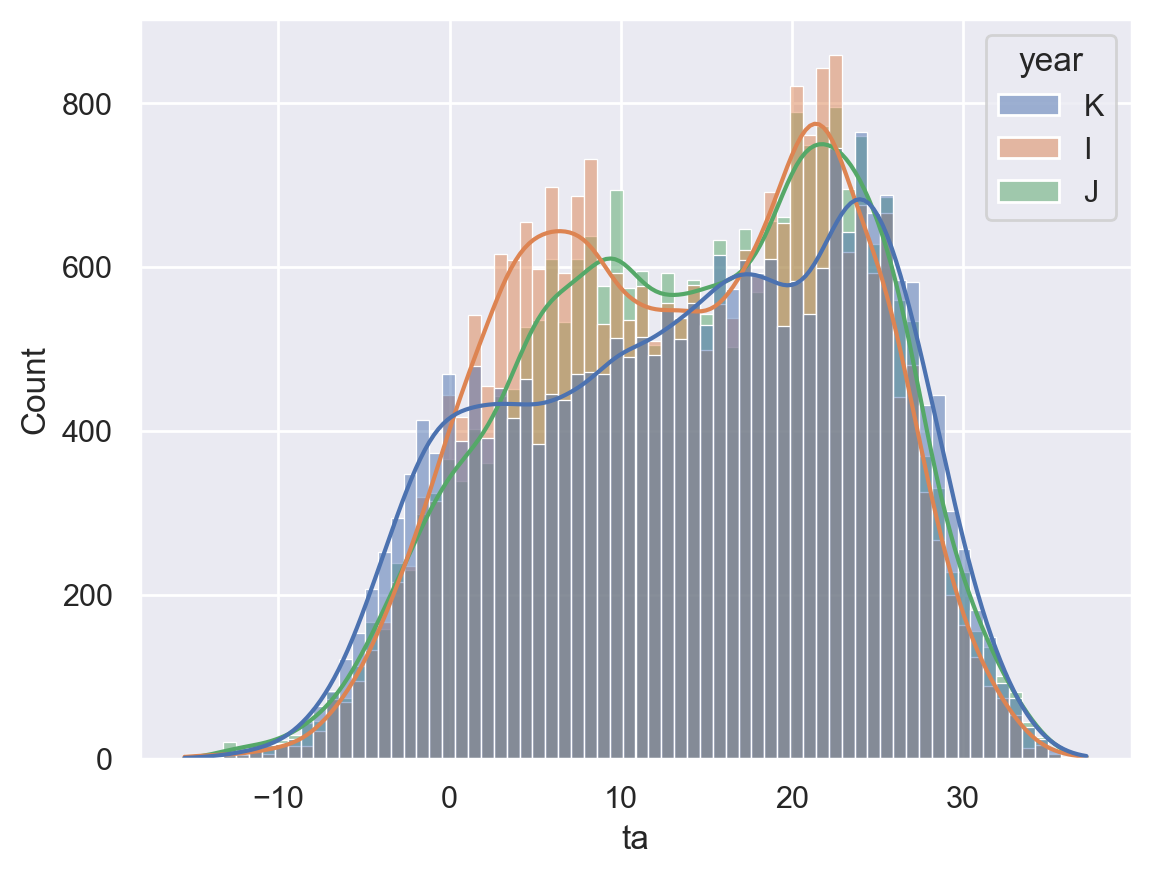

In [66]:
# 연도에 따른 ta 컬럼 시각화
# sns.boxplot(data=df, x="year", y="ta", hue="year")
sns.histplot(data=df, x="ta", hue="year", kde=True)
plt.show()

### 6-2-1. 정규성 검사

In [71]:
# 정규성 검사

ta_j = df[(df["year"]=="J")]["ta"]
ta_k = df[(df["year"]=="K")]["ta"]

# Anderson-Darling Test
anderson_result_j = stats.anderson(ta_j, dist="norm")
anderson_result_k = stats.anderson(ta_k, dist="norm")

In [72]:
for year, anderson in zip(["J", "K"], [anderson_result_j, anderson_result_k]):
    
    print(f"{year}년의 정규성 검사 결과")
    print('검정 통계량 :', anderson[0])
    print("임계값 :", anderson[1])
    print("각 임계값의 p-value :", anderson[2], "\n")


J년의 정규성 검사 결과
검정 통계량 : 161.50222444291285
임계값 : [0.576 0.656 0.787 0.918 1.092]
각 임계값의 p-value : [15.  10.   5.   2.5  1. ] 

K년의 정규성 검사 결과
검정 통계량 : 214.5554389438803
임계값 : [0.576 0.656 0.787 0.918 1.092]
각 임계값의 p-value : [15.  10.   5.   2.5  1. ] 



In [73]:
# 정규성 결과에 따라 __에 O, X를 넣어주세요
print("J년의 ta 컬럼은 정규분포를 따른다 : __")
print("K년의 ta 컬럼은 정규분포를 따른다 : __")

J년의 ta 컬럼은 정규분포를 따른다 : __
K년의 ta 컬럼은 정규분포를 따른다 : __


### 6-2-2. 등분산성 검사

In [76]:
# 정규성을 만족한다면, 등분산성 검사를 시행해주세요
# 정규성을 만족하지 못한다면, 해당 부분을 스킵하고 비모수적 검정을 진행해주세요

### 6-2-3. 두 모집단의 평균차 검정

In [77]:
from scipy.stats import mannwhitneyu
mannwhitneyu(ta_j, ta_k)

MannwhitneyuResult(statistic=307427720.0, pvalue=0.363300314428064)

## 6-3. 짝으로 된 자료에 대한 검정
- I년의 `is_fog` 여부에 따라, 안개가 꼈을 때 `ts`가 내려갔을까요?

In [80]:
df_i = df[df["year"]=="I"]
df_i.head(3)

,year,month,day,time,minute,stn_id,ws10_deg,ws10_ms,ta,re,hm,sun10,ts,vis1,class,is_fog,dew_point,dew_reached,temp_diff,ws10_dir,t_td
2,I,11,8,18,40,E,324.7,3.9,14.7,0.0,26.5,0.0,12.2,50000,4,0,-3.753022,0,2.5,NW,18.453022
5,I,3,5,13,20,B,240.1,3.7,1.5,0.0,42.6,0.5,-0.2,17635,4,0,-9.450206,0,1.7,SW,10.950206
8,I,7,22,20,40,B,148.0,0.8,22.1,1.0,92.9,0.0,23.2,4963,4,0,20.933320,0,-1.1,SE,1.166680


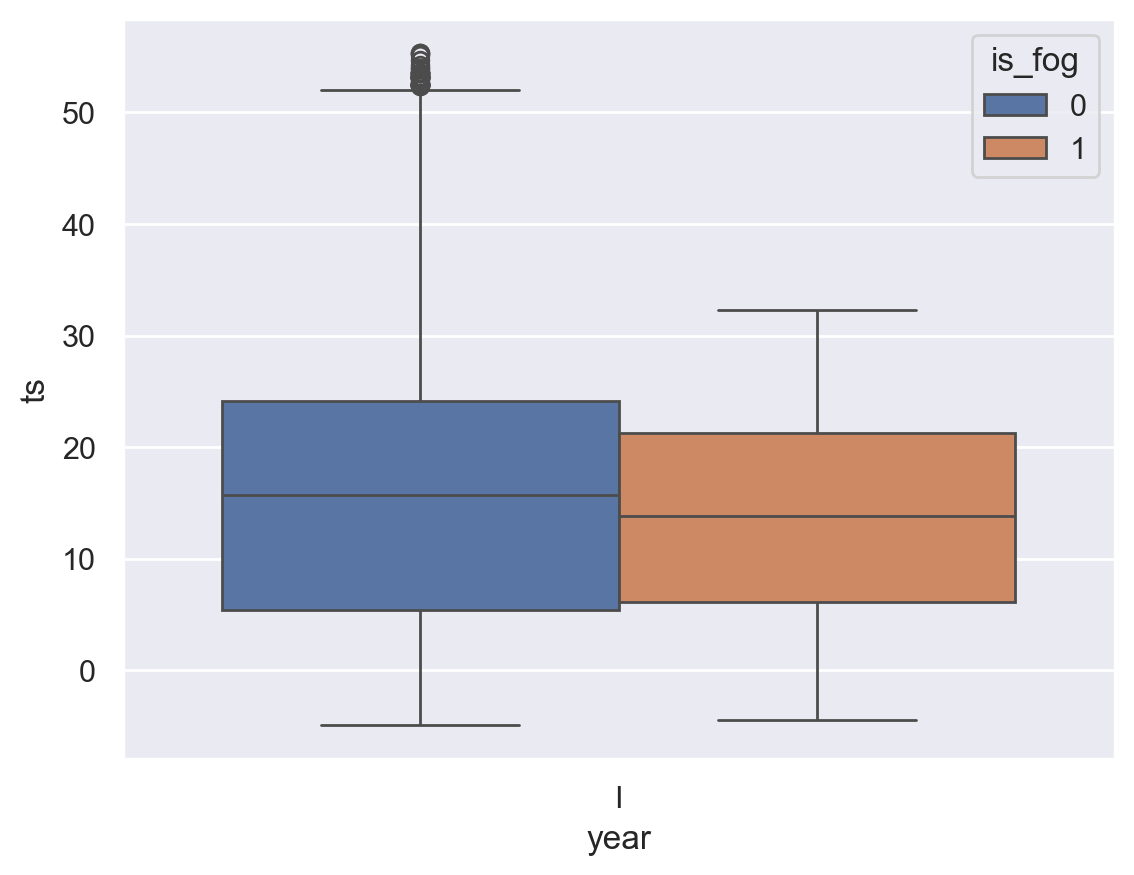

In [87]:
# 안개 유무에 따른 ts 컬럼을 시각화해주세요
sns.boxplot(data=df_i, x="year", y="ts", hue="is_fog")
plt.show()

### 6-3-1. 정규성 검사

In [93]:
# 정규성 검사
df_i_no_fog = df_i[df_i["is_fog"]==0]["ts"]
df_i_yes_fog = df_i[df_i["is_fog"]==1]["ts"]

# Anderson-Darling Test
anderson_result_no_fog = stats.anderson(df_i_no_fog, dist="norm")
anderson_result_yes_fog = stats.anderson(df_i_yes_fog, dist="norm")

In [95]:
for year, anderson in zip(["no", "yes"], [anderson_result_no_fog, anderson_result_yes_fog]):
    
    print("안개 유무 :", year)
    print('검정 통계량 :', anderson[0])
    print("임계값 :", anderson[1])
    print("각 임계값의 p-value :", anderson[2], "\n")

안개 유무 : no
검정 통계량 : 180.89120523067322
임계값 : [0.576 0.656 0.787 0.918 1.092]
각 임계값의 p-value : [15.  10.   5.   2.5  1. ] 

안개 유무 : yes
검정 통계량 : 4.31701726092723
임계값 : [0.568 0.647 0.777 0.906 1.077]
각 임계값의 p-value : [15.  10.   5.   2.5  1. ] 



### 6-3-2. 등분산성 검사

In [96]:
# 정규성을 만족한다면, 등분산성 검사를 시행해주세요
# 정규성을 만족하지 못한다면, 해당 부분을 스킵하고 비모수적 검정을 진행해주세요

### 6-2-3. 두 모집단의 평균차 검정

In [100]:
from scipy.stats import mannwhitneyu
mannwhitneyu(df_i_no_fog, df_i_yes_fog, alternative="greater")

MannwhitneyuResult(statistic=3945227.0, pvalue=0.0076959478058820354)